<a href="https://colab.research.google.com/github/DayvsonNascimento/ri_lab_03/blob/master/ri_lab_03_dayvson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import collections

data = pd.read_csv('results.csv')
articles_text = data['text']

Questão 1: Para esta questão foi utilizado um regex para que fossem mantidas apenas as strings que começam com uma 
letra, seja ela maíscula ou minúscula, desconsiderando as strings que começam com algum número. Além disso, a coleção também 
foi filtrada com base na remoção de stop words da língua portuguesa e de strings de 'length' menor ou igual a 2. Utilizando esta etratégia é possível manter 
apenas as palavras que são relevantes para a prática realizada neste laboratório, com a remoção de caracteres numéricos,
stop words e a não distinção de palavras iniciadas com letra maíscula e minúscula, para que, por exemplo, "STF" e "stf" não sejam consideradas palavras diferentes.

In [0]:
stopwords = stopwords.words('portuguese')
tokenizer = RegexpTokenizer(r'\b[^\d\W]+')

tokens = []

for text in articles_text:
    tokens += tokenizer.tokenize(text.lower())

tokens_filter = list(filter(lambda token:len(token) > 2 and token not in stopwords, tokens))

Quesao 2: Refaça a questão 2 do Laboratório anterior usando os tokens produzidos.

In [0]:
frequency = nltk.FreqDist(tokens_filtered)
top_50_words = frequency.most_common(50)
df = pd.DataFrame(top_50_words, columns = ['Word', 'Freq.'])
pr = df['Freq.'] / len(tokens_filtered)
df['r'] = df['Freq.'].rank(ascending = False)
df['Pr(%)'] = pr * 100
df['r.Pr'] = df['r'] * pr

df

,Word,Freq.,r,Pr(%),r.Pr
0,bolsonaro,92,1.0,1.433915,0.014339
1,disse,73,2.0,1.137781,0.022756
2,jair,69,3.0,1.075436,0.032263
3,presidente,56,4.0,0.872818,0.034913
4,ser,52,5.0,0.810474,0.040524
5,governo,46,6.5,0.716958,0.046602
6,hoje,46,6.5,0.716958,0.046602
7,ministro,43,8.0,0.670200,0.053616
8,vai,39,9.0,0.607855,0.054707
9,segundo,35,10.0,0.545511,0.054551


Questão 3: Aplique Stemming nos tokens produzidos e encontre 10 exemplos de falsos positivos e 10 exemplos de falsos negativos. Que impacto você acha que falsos positivos e negativos, como esses, teriam no processamento de consultas? Dê exemplos.

In [0]:
stemmer = nltk.stem.RSLPStemmer()

stemmed_tokens = [stemmer.stem(token) for token in list(tokens_filtered)]

# Falsos Positivos:

particip - ['participa', 'participou', 'participando', 'participava', 'participar', 'participam', 'participe', 'participantes'] 

diss - ['disse', 'disso'] 

ministr - ['ministro', 'ministros', 'ministrou', 'ministra'] 

tem - ['temer', 'tema', 'temem', 'temas'] 

lei - ['leia', 'leiam', 'lei'] 

registr - ['registrar', 'registra', 'registro', 'registramos', 'registrou'] 

ouv - ['ouvido', 'ouvir', 'ouvi', 'ouviu', 'ouvidos'] 

public - ['publicamos', 'publicada', 'publicado', 'publicou', 'publicados', 'publicam', 'publicidade'] 

segund - ['segundo', 'segunda']

conhec - ['conhecimento', 'conheci', 'conhecidas', 'conhecido']


# Falsos Negativos:

secret/secretar 

consider/consid 

anunc/anunci 

achac/acham 

super/superior

apo/apoi 

abert/aberta 

terc/terceir 

total/totali

Os impactos estariam relacionados a resultados de consultas não compatíveis com aquilo que se esperava/desejava. Resultados que deveriam estar dentro do que era esperado para o consulta podem não ser retornados por conta de um falso negativo, por sua vez, resultados que não fazem parte do contexto esperado podem ser retornados devido aos falosos positivos. Por exemplo, ao utilizar uma palavra chave "total" para realizar uma consulta, resultados que tenham "totalizando", "totalizou" podem não ser retornados. 

Questão 4: Refaça a questão 3 do Laboratório anterior usando os tokens stemizados. Você percebeu alguma diferença em relação aos tokens sem stemming? Se sim, quais?

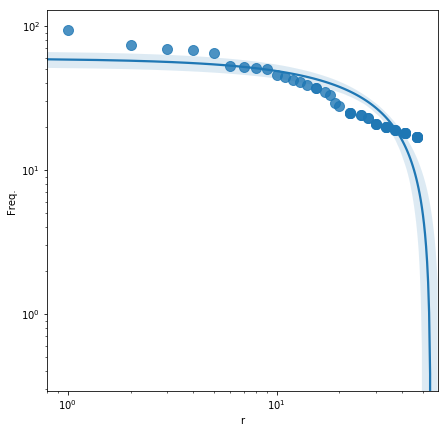

In [0]:
stemmed_frequency = nltk.FreqDist(stemmed_tokens)
top_50_words = stemmed_frequency .most_common(50)
df = pd.DataFrame(top_50_words, columns = ['Word', 'Freq.'])
pr = df['Freq.'] / len(tokens_filtered)
df['r'] = df['Freq.'].rank(ascending = False)
df['Pr(%)'] = pr * 100
df['r.Pr'] = df['r'] * pr

"""
   Curva de rank-frequência (usando escala logarítmica) para palavras da coleção
"""
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale='log', yscale='log')
sns.regplot('r', 'Freq.', df, ax=ax, scatter_kws={"s": 100})

Comparando este gráfico com o mesmo obtido na questão 3 do laboratório anterior, é possível perceber uma maior linearização da disposição do gráfico, além de uma maior proximidade com a estimativa.

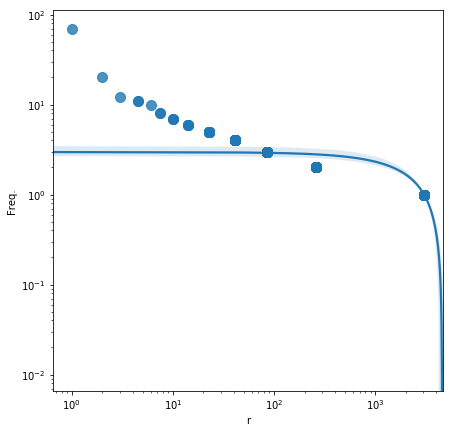

In [0]:
bigrams = nltk.bigrams(stemmed_tokens)
bigrams_frequency = nltk.FreqDist(bigrams)

df = pd.DataFrame(bigrams_frequency.most_common(), columns=['Word', 'Freq.'])
df['r'] = df['Freq.'].rank(ascending = False)

"""
   Curva de rank-frequência (usando escala logarítmica) para bigramas da coleção
"""
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale='log', yscale='log')
sns.regplot('r', 'Freq.', df, ax=ax, scatter_kws={"s": 100})

Já para o segundo gráfico, é possível perceber que este apresentou uma disperção de tokens levemente maior, se comparado ao mesmo gráfico do laboratório anterior.